<a href="https://colab.research.google.com/github/prajakta1211/Bar-Code-detection-using-OpenCV/blob/main/DIP_BarCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

grayscale


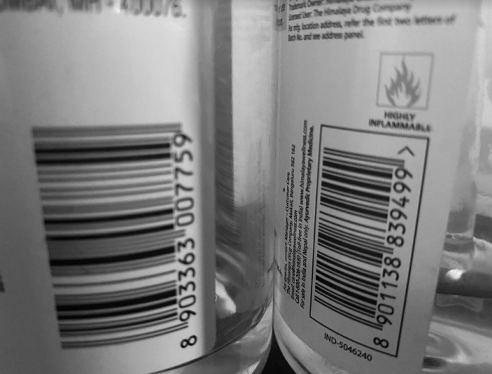

Gradient


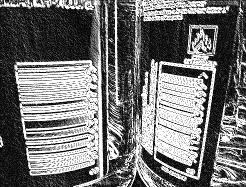

blurred


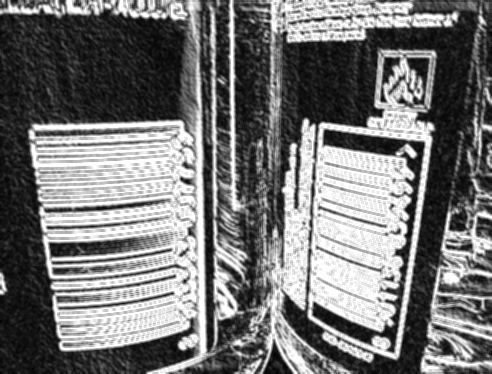

Threshold


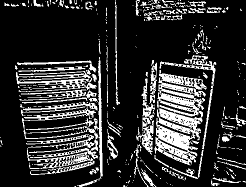

Closing


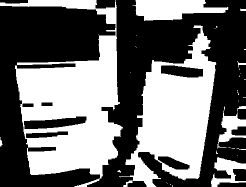

Erosion and Dilation


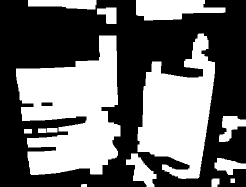

Final Image


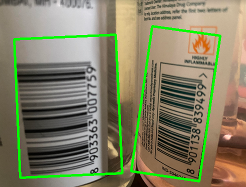

In [ ]:
# python detect_barcode_opencv.py 
# import the necessary packages
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

show = 1

# load the image and convert it to grayscale
image = cv2.imread("/content/image.png")

#resize image
#‘INTER_CUBIC’, which interpolates the 2X2 neighboring pixels (interpolate - enlarge)
#fx - scaling factor along x axis, fy - scaling factor along y axis
image = cv2.resize(image,None,fx=0.7, fy=0.7, interpolation = cv2.INTER_CUBIC)

#convert to grayscale
#computational complexity is reduced
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print("grayscale")
cv2_imshow(gray)
#calculate x & y gradient
#gradient magnitude representation of the grayscale image in the horizontal and vertical directions
gradX = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 1, dy = 0, ksize = -1)
gradY = cv2.Sobel(gray, ddepth = cv2.CV_32F, dx = 0, dy = 1, ksize = -1)

#subtract the y-gradient from the x-gradient
#By performing this subtraction we are left with regions of the image
#that have high horizontal gradients and low vertical gradients.
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)
if show == 1:
	print("Gradient")
	cv2_imshow(cv2.resize(gradient,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# blur the image
#This will help smooth out high frequency noise in the gradient representation of the image.
blurred = cv2.blur(gradient, (3, 3))
print("blurred")
cv2_imshow(blurred)
# threshold the image
#Any pixel in the gradient image that is not greater than 225 is set to 0 (black). 
#Otherwise, the pixel is set to 255 (white).
(_, thresh) = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

if show == 1:
	print("Threshold")
	cv2_imshow(cv2.resize(thresh,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

#construct a closing kernel and apply it to the thresholded image
#Closing is reverse of Opening, Dilation followed by Erosion. It is useful in closing small holes
#inside the foreground objects, or small black points on the object.
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

if show == 1:
	print("Closing")
	cv2_imshow(cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# perform a series of erosions and dilations
#we have small blobs in the image that are not part of the actual barcode, but may interfere 
#with our contour detection hence we are performing 4 iterations of erosions, followed by 4 iterations of dilations.
closed = cv2.erode(closed, None, iterations = 4)
closed = cv2.dilate(closed, None, iterations = 4)

if show == 1:
	print("Erosion and Dilation")
	cv2_imshow(cv2.resize(closed,None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC))

# find the contours in the thresholded image, then sort the contours
# by their area, keeping only the largest one
cnts,hierarchy = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)[-2:]

c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
c1 = sorted(cnts, key = cv2.contourArea, reverse = True)[1]

# compute the rotated bounding box of the largest contour
rect = cv2.minAreaRect(c)
box = np.int0(cv2.boxPoints(rect))
rect1 = cv2.minAreaRect(c1)
box1 = np.int0(cv2.boxPoints(rect1))

# draw a bounding box arounded the detected barcode and display the
# image
cv2.drawContours(image, [box], -1, (0, 255, 0), 3)
cv2.drawContours(image, [box1], -1, (0, 255, 0), 3)

image = cv2.resize(image, None, fx=0.5, fy=0.5, interpolation = cv2.INTER_CUBIC)

print("Final Image")
cv2_imshow(image)
